In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import hashlib
import math
import os.path
import random
import re
import sys
import tarfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

from tensorflow.python.ops import gen_audio_ops as audio_ops
from tensorflow.python.ops import io_ops
from tensorflow.python.platform import gfile
from tensorflow.python.util import compat



In [2]:
# work, try building with bazel instead of running the Python script directly.
try:
  from tensorflow.lite.experimental.microfrontend.python.ops import audio_microfrontend_op as frontend_op  # pylint:disable=g-import-not-at-top
except ImportError:
  frontend_op = None

In [5]:
import sys
# We add this path so we can import the speech processing modules
import input_data
import models
import numpy as np

In [6]:
WANTED_WORDS = "yes,no"
DATASET_DIR = './dataset'
PREPROCESS = 'micro'
WINDOW_STRIDE = 20
SAMPLE_RATE = 16000
CLIP_DURATION_MS = 1000
WINDOW_SIZE_MS = 40.0
FEATURE_BIN_COUNT = 40
BACKGROUND_FREQUENCY = 0.8
BACKGROUND_VOLUME_RANGE = 0.1
TIME_SHIFT_MS = 100.0
SILENT_PERCENTAGE =10
UNKNOWN_PERCENTAGE =25
DATA_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz'
VALIDATION_PERCENTAGE = 10
TESTING_PERCENTAGE = 10
LOGS_DIR = './logs'

In [7]:
model_settings = models.prepare_model_settings(
    len(input_data.prepare_words_list(WANTED_WORDS.split(','))),
    SAMPLE_RATE, CLIP_DURATION_MS, WINDOW_SIZE_MS,
    WINDOW_STRIDE, FEATURE_BIN_COUNT, PREPROCESS)
audio_processor = input_data.AudioProcessor(
    DATA_URL, DATASET_DIR,
    SILENT_PERCENTAGE, UNKNOWN_PERCENTAGE,
    WANTED_WORDS.split(','), VALIDATION_PERCENTAGE,
    TESTING_PERCENTAGE, model_settings, LOGS_DIR)

In [8]:
with tf.compat.v1.Session() as sess:
    train_fingerprints, train_ground_truth = audio_processor.get_data(-1,0, model_settings,BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'training', sess)

In [9]:
with tf.compat.v1.Session() as sess:
    val_fingerprints, val_ground_truth = audio_processor.get_data(-1,0, model_settings,BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'validation', sess)

In [10]:
with tf.compat.v1.Session() as sess:
    test_fingerprints, test_ground_truth = audio_processor.get_data(-1,0, model_settings,BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'testing', sess)

In [38]:
import pickle

In [42]:
with open("test_data.pkl",'wb') as file:
    pickle.dump(test_fingerprints,file)
with open("test_labels.pkl",'wb') as file1:
    pickle.dump(test_ground_truth,file1)

In [11]:
import matplotlib.pyplot as plt

In [12]:
WANTED_WORDS

'yes,no'

In [13]:
labels  = ['silence','unknown']+WANTED_WORDS.split(',')

In [14]:
print(labels)

['silence', 'unknown', 'yes', 'no']


In [15]:
def plots(i):
    print(labels[int(train_ground_truth[i])])
    plt.imshow(train_fingerprints[i].reshape(49,40).T)

yes


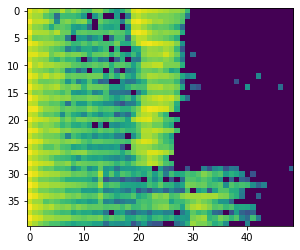

In [16]:
plots(7)

no


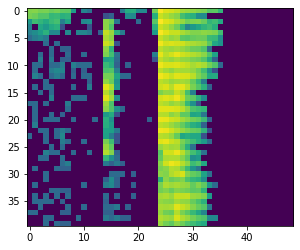

In [17]:
plots(687)

In [18]:
WANTED_WORDS

'yes,no'

no


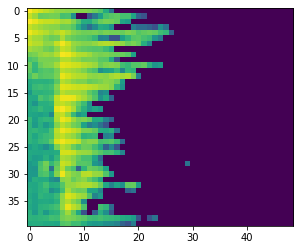

In [21]:
plots(7004)

In [22]:
train_fingerprints[0].reshape(49,40)

array([[25.9375   , 24.375    , 25.8984375, ..., 23.203125 , 24.84375  ,
        23.828125 ],
       [22.5390625, 22.03125  , 25.0390625, ..., 21.7578125, 23.75     ,
        21.7578125],
       [21.2109375, 20.46875  , 22.65625  , ..., 20.3515625, 23.671875 ,
        21.40625  ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       , 10.9375   ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

In [23]:
train_ground_truth

array([1., 0., 1., ..., 2., 3., 3.])

In [24]:

from tensorflow.keras.layers.experimental import preprocessing

In [25]:
from tensorflow.keras import models as mod

In [26]:
from tensorflow.keras import layers

In [85]:
import numpy as np

In [39]:
train2 = np.expand_dims(train_fingerprints, axis=2)

In [40]:
train2.shape

(16387, 1960, 1)

In [41]:
labels2 = np.expand_dims(train_ground_truth,axis=1)

In [42]:
labels2.shape

(16387, 1)

In [43]:
train2.shape[1:]

(1960, 1)

In [45]:
valdata  = np.expand_dims(val_fingerprints,axis=2)
vallabels = np.expand_dims(val_ground_truth,axis=1)

In [46]:
testdata  = np.expand_dims(test_fingerprints,axis=2)
testlabels = np.expand_dims(test_ground_truth,axis=1)

In [47]:
train2.shape[1:]

(1960, 1)

In [21]:
train_fingerprints.shape

(16387, 1960)

In [30]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(1960)))
model.add(layers.Reshape((49, 40,1)))
model.add(layers.Conv2D(12,kernel_size=(10,8), activation='relu')) 


model.add(layers.Dropout(0.10))
model.add(layers.MaxPool2D(pool_size=(4, 4), strides=None, padding="valid"))
#model.add(layers.Conv2D(4, kernel_size=(5,4), activation='relu')) 
#model.add(layers.MaxPool2D())
model.add(layers.Flatten()),
model.add(layers.Dense(144, activation='relu')),
model.add(layers.Dropout(0.10)),
model.add(layers.Dense(len(labels), activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 49, 40, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 33, 12)        972       
_________________________________________________________________
dropout_4 (Dropout)          (None, 40, 33, 12)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 8, 12)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 144)               138384    
_________________________________________________________________
dropout_5 (Dropout)          (None, 144)              

In [32]:
EPOCHS = 100
history = model.fit(
    train_fingerprints, 
  train_ground_truth,
    validation_data=(val_fingerprints,val_ground_truth),
    epochs=EPOCHS,
)

Train on 8584 samples, validate on 1085 samples
Epoch 1/100
8584/8584 [==============================] - 3s 345us/sample - loss: 1.0726 - accuracy: 0.6676 - val_loss: 1.0560 - val_accuracy: 0.6793
Epoch 2/100
8584/8584 [==============================] - 3s 344us/sample - loss: 1.0164 - accuracy: 0.7241 - val_loss: 0.9941 - val_accuracy: 0.7456
Epoch 3/100
8584/8584 [==============================] - 3s 344us/sample - loss: 0.9984 - accuracy: 0.7431 - val_loss: 0.9808 - val_accuracy: 0.7631
Epoch 4/100
8584/8584 [==============================] - 3s 343us/sample - loss: 0.9860 - accuracy: 0.7559 - val_loss: 0.9752 - val_accuracy: 0.7659
Epoch 5/100
8584/8584 [==============================] - 3s 345us/sample - loss: 0.9791 - accuracy: 0.7630 - val_loss: 0.9709 - val_accuracy: 0.7714
Epoch 6/100
8584/8584 [==============================] - 3s 343us/sample - loss: 0.9575 - accuracy: 0.7827 - val_loss: 0.9436 - val_accuracy: 0.7991
Epoch 7/100
8584/8584 [==============================] - 3

8584/8584 [==============================] - 3s 331us/sample - loss: 0.7833 - accuracy: 0.9630 - val_loss: 0.8368 - val_accuracy: 0.9069
Epoch 56/100
8584/8584 [==============================] - 3s 331us/sample - loss: 0.7827 - accuracy: 0.9631 - val_loss: 0.8387 - val_accuracy: 0.9041
Epoch 57/100
8584/8584 [==============================] - 3s 332us/sample - loss: 0.7820 - accuracy: 0.9642 - val_loss: 0.8367 - val_accuracy: 0.9078
Epoch 58/100
8584/8584 [==============================] - 3s 331us/sample - loss: 0.7816 - accuracy: 0.9642 - val_loss: 0.8588 - val_accuracy: 0.8783
Epoch 59/100
8584/8584 [==============================] - 3s 329us/sample - loss: 0.7817 - accuracy: 0.9637 - val_loss: 0.8404 - val_accuracy: 0.9032
Epoch 60/100
8584/8584 [==============================] - 3s 328us/sample - loss: 0.7807 - accuracy: 0.9652 - val_loss: 0.8373 - val_accuracy: 0.9060
Epoch 61/100
8584/8584 [==============================] - 3s 329us/sample - loss: 0.7798 - accuracy: 0.9663 - val

In [79]:
EPOCHS = 100
history = model.fit(
    train2, 
  labels2,
    validation_data=(valdata,vallabels),
    epochs=EPOCHS,
)

Train on 16387 samples, validate on 1948 samples
Epoch 1/100
16387/16387 [==============================] - 6s 358us/sample - loss: 1.2318 - accuracy: 0.8116 - val_loss: 1.2139 - val_accuracy: 0.8306
Epoch 2/100
16387/16387 [==============================] - 6s 351us/sample - loss: 1.2248 - accuracy: 0.8202 - val_loss: 1.2169 - val_accuracy: 0.8270
Epoch 3/100
16387/16387 [==============================] - 6s 358us/sample - loss: 1.2185 - accuracy: 0.8266 - val_loss: 1.2178 - val_accuracy: 0.8280
Epoch 4/100
16387/16387 [==============================] - 6s 347us/sample - loss: 1.2136 - accuracy: 0.8305 - val_loss: 1.2180 - val_accuracy: 0.8203
Epoch 5/100
16387/16387 [==============================] - 6s 347us/sample - loss: 1.2091 - accuracy: 0.8354 - val_loss: 1.2671 - val_accuracy: 0.7782
Epoch 6/100
16387/16387 [==============================] - 6s 348us/sample - loss: 1.2025 - accuracy: 0.8413 - val_loss: 1.2080 - val_accuracy: 0.8362
Epoch 7/100
16387/16387 [====================

In [80]:
model.save("my_h5_model1.h5")

In [121]:
EPOCHS = 10
history = model.fit(
    train2, 
  labels2,
    validation_data=(valdata,vallabels),
    epochs=EPOCHS,
)

Train on 16387 samples, validate on 1948 samples
Epoch 1/10
16387/16387 [==============================] - 7s 445us/sample - loss: 1.3252 - accuracy: 0.7405 - val_loss: 1.2955 - val_accuracy: 0.7690
Epoch 2/10
16387/16387 [==============================] - 7s 445us/sample - loss: 1.3121 - accuracy: 0.7536 - val_loss: 1.2971 - val_accuracy: 0.7669
Epoch 3/10
16387/16387 [==============================] - 7s 444us/sample - loss: 1.3107 - accuracy: 0.7516 - val_loss: 1.3003 - val_accuracy: 0.7649
Epoch 4/10
16387/16387 [==============================] - 7s 446us/sample - loss: 1.2991 - accuracy: 0.7620 - val_loss: 1.2734 - val_accuracy: 0.7859
Epoch 5/10
16387/16387 [==============================] - 7s 445us/sample - loss: 1.2922 - accuracy: 0.7685 - val_loss: 1.6540 - val_accuracy: 0.3999
Epoch 6/10
16387/16387 [==============================] - 7s 444us/sample - loss: 1.2922 - accuracy: 0.7633 - val_loss: 1.2742 - val_accuracy: 0.7839
Epoch 7/10
16387/16387 [===========================

In [90]:
test_ground_truth

array([2., 3., 0., ..., 5., 0., 1.])

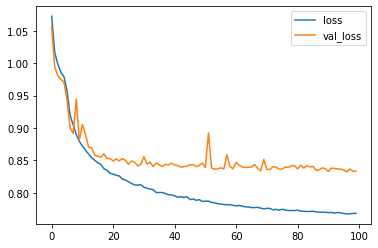

In [33]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [34]:
model.save("my_h5_model_2rank.h5")

In [36]:
#df = np.expand_dims(test_fingerprints,axis=2)
y_pred = np.argmax(model.predict(test_fingerprints), axis=1)
y_true = test_ground_truth
test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
with tf.compat.v1.Session():
      print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion_mtx,feed_dict=None, session=None))
    

Test set accuracy: 89%
Confusion Matrix: 

 [[ 78   4   1   0]
 [  0 143  14  49]
 [  2  15 387  15]
 [  1  21   3 380]]


In [97]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpooqjs023/assets


NotImplementedError: numpy() is only available when eager execution is enabled.

In [43]:
train = tf.data.Dataset.from_tensor_slices((train2,labels2))

In [ ]:
test = tf.data.Dataset.from_tensor_slices((te))

In [44]:
model = tf.keras.Sequential()
model.add(layers.Reshape((49, 40,1), input_shape=train2.shape[1:]))
model.add(layers.Conv2D(128,3, activation='relu', input_shape=train2.shape[1:])) 
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu')) 
model.add(layers.Flatten()),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dropout(0.5)),
model.add(layers.Dense(4, activation='softmax'))
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()
EPOCHS = 10
history = model.fit(
    train2, 
  labels2,
    epochs=EPOCHS,
)

Train on 8440 samples
Epoch 1/10
8440/8440 [==============================] - 17s 2ms/sample - loss: 1.2858 - accuracy: 0.4513
Epoch 2/10
8440/8440 [==============================] - 17s 2ms/sample - loss: 1.0876 - accuracy: 0.6556
Epoch 3/10
8440/8440 [==============================] - 17s 2ms/sample - loss: 1.0227 - accuracy: 0.7229
Epoch 4/10
8440/8440 [==============================] - 17s 2ms/sample - loss: 0.9814 - accuracy: 0.7629
Epoch 5/10
8440/8440 [==============================] - 18s 2ms/sample - loss: 0.9597 - accuracy: 0.7834
Epoch 6/10
8440/8440 [==============================] - 18s 2ms/sample - loss: 0.9428 - accuracy: 0.8017
Epoch 7/10
8440/8440 [==============================] - 17s 2ms/sample - loss: 0.9350 - accuracy: 0.8090
Epoch 8/10
8440/8440 [==============================] - 17s 2ms/sample - loss: 0.9247 - accuracy: 0.8191
Epoch 9/10
8440/8440 [==============================] - 18s 2ms/sample - loss: 0.9156 - accuracy: 0.8294
Epoch 10/10
8440/8440 [==========

In [46]:
EPOCHS = 100
history = model.fit(
    train2, 
  labels2,validation_data=(valdata,vallabels),
    epochs=EPOCHS
)

Train on 8440 samples, validate on 1112 samples
Epoch 1/100
8416/8440 [============================>.] - ETA: 0s - loss: 0.8993 - accuracy: 0.8434WARNING:tensorflow:From /home/aml/anaconda3/envs/saad3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
8440/8440 [==============================] - 18s 2ms/sample - loss: 0.8994 - accuracy: 0.8432 - val_loss: 0.9104 - val_accuracy: 0.8273
Epoch 2/100
8440/8440 [==============================] - 18s 2ms/sample - loss: 0.8983 - accuracy: 0.8443 - val_loss: 0.9071 - val_accuracy: 0.8381
Epoch 3/100
8440/8440 [==============================] - 18s 2ms/sample - loss: 0.8898 - accuracy: 0.8541 - val_loss: 0.9111 - val_accuracy: 0.8255
Epoch 4/100
8440/8440 [=======================

In [37]:
WANTED_WORDS

'one,two,three,four,five'

In [ ]:
with tf.compat.v1.Session() as sess:
    val_fingerprints, val_ground_truth = audio_processor.get_data(-1,0, model_settings,BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'validation', sess)

In [51]:
  with tf.compat.v1.Session() as sess:
    test_data, test_labels = audio_processor.get_data(
        -1, 0, model_settings, BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'validation', sess)
    test_data = np.expand_dims(test_data, axis=2).astype(np.float32)

In [55]:
train2.shape

(8440, 1960, 1)

In [52]:
test_data.shape

(940, 1960, 1)

In [57]:
labels2.shape

(8440, 1)

In [58]:
test_data[0].shape

(1960, 1)

In [62]:
df=np.expand_dims(test_data[1],axis=0)

In [63]:
model.predict(df)

array([[5.6066353e-11, 9.9336100e-01, 6.6390340e-03, 9.3249627e-13]],
      dtype=float32)

In [70]:
test_labels[1]

1.0

In [71]:
np.expand_dims(test_data[1],axis=0)
y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
with tf.compat.v1.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion_mtx,feed_dict=None, session=None))

Test set accuracy: 89%


Confusion Matrix: 

 [[ 66   1   1   2]
 [  0 120  22  32]
 [  3  17 324   7]
 [  0  13   2 330]]


array([2])

In [122]:
model.save('kwsm.h5')

In [96]:
with tf.Session() as sess:
  float_converter = tf.lite.TFLiteConverter.from_keras_model(model)
  float_tflite_model = float_converter.convert()
  float_tflite_model_size = open(FLOAT_MODEL_TFLITE, "wb").write(float_tflite_model)
  print("Float model is %d bytes" % float_tflite_model_size)

  converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL)
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  converter.inference_input_type = tf.lite.constants.INT8
  converter.inference_output_type = tf.lite.constants.INT8
  def representative_dataset_gen():
    for i in range(100):
      data, _ = audio_processor.get_data(1, i*1, model_settings,
                                         BACKGROUND_FREQUENCY, 
                                         BACKGROUND_VOLUME_RANGE,
                                         TIME_SHIFT_MS,
                                         'testing',
                                         sess)
      flattened_data = np.array(data.flatten(), dtype=np.float32).reshape(1, 1960)
      yield [flattened_data]
  converter.representative_dataset = representative_dataset_gen
  tflite_model = converter.convert()
  tflite_model_size = open(MODEL_TFLITE, "wb").write(tflite_model)
  print("Quantized model is %d bytes" % tflite_model_size)

AttributeError: module 'tensorflow' has no attribute 'Session'